In [2]:
import numpy as np
import math
a=np.array([1,3,5,6])
# mean
mean_a=np.mean(a)
mean_a

3.75

In [3]:
# mean of data containing Nan values
a_nan=np.array([1,3,5,6,math.nan])
mean_a_nan=np.nanmean(a_nan)
mean_a_nan

3.75

In [4]:
# variance 
variance_a=np.var(a)
variance_a

3.6875

In [5]:
# variance of data containing Nan values
mean_a_nan=np.nanvar(a_nan,ddof=1)
mean_a_nan

4.916666666666667

In [6]:
# Standard Deviation 
variance_a=np.std(a)
variance_a



2.217355782608345

In [7]:
# Standard Deviation of data containing Nan values
mean_a_nan=np.nanstd(a_nan,ddof=1)
mean_a_nan

2.217355782608345

In [8]:
# Covariance
b=np.array([1,3,5,6])
c=np.array([-2,-4,-5,-6])
cov_bc=np.cov(b,c)
cov_bc

array([[ 4.91666667, -3.75      ],
       [-3.75      ,  2.91666667]])

In [9]:
#Correlation
corr=np.corrcoef(b,c)
corr

array([[ 1.        , -0.99026741],
       [-0.99026741,  1.        ]])

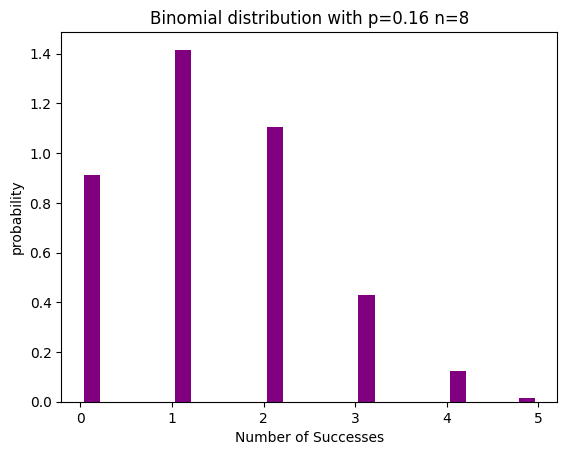

In [10]:

# Binomial Distribution
n=8
P=0.16
N=1000
X=np.random.binomial(n,P,N)
import matplotlib.pyplot as plt
counts,bins,ignored=plt.hist(X,20,density=True,rwidth=0.7, color='purple')
plt.title("Binomial distribution with p=0.16 n=8")
plt.xlabel("Number of Successes")
plt.ylabel("probability")
plt.show()


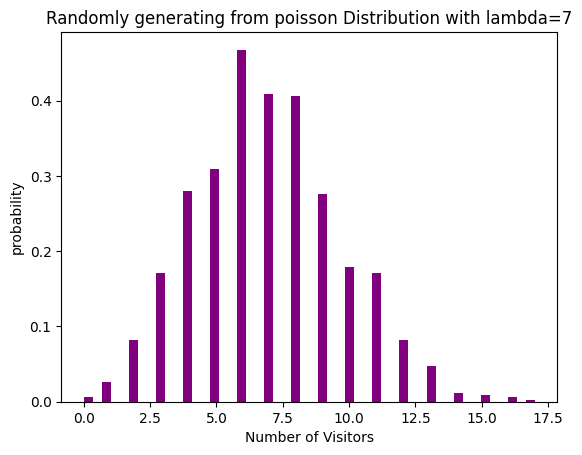

In [11]:
#Random Generation of 1000 independent Poisson samples
import numpy as np
lambda_=7
N=1000
X=np.random.poisson(lambda_,N)

#Histogram of poisson distribution
import matplotlib.pyplot as plt
counts,bins,ignored=plt.hist(X,50, density=True, color='purple')
plt.title("Randomly generating from poisson Distribution with lambda=7")
plt.xlabel("Number of Visitors")
plt.ylabel("probability")
plt.show()

In [7]:
#Random Generation of 1000 independent Normal samples 
import numpy as np
mu=0
sigma=1
N=1000
X=np.random.normal(mu,sigma,N)

#Population distribution from scipy.stats import norm 
x_values=np.arange(-5,5,0.01)
y_values=norm.pdf(x_values)
#Sample histogram with population distribution
import matplotlib.pyplot as plt
counts,bins,ignored=plt.hist(X,30,density=True,color='purple', label='Sampling Distribution')
plt.plot(x_values,y_values,color='y',linewidth=2.5,label='Population Distribution')
plt.title("Randomly generating 1000 obs from Normal distribution mu=0 sigma-1")
plt.ylabel("Probability")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'norm'

In [1]:
#R code for the graph
install.packages("ggplot2")
install.packages("palmerpenguins")
library(palmerpenguins)
library(ggplot2)

view(data(penguins))

ggplot(data=penguins, aes(x=flipper_length_mm,y=body_mass_g))+geom_smooth(method="lm",se=FALSE,color='purple')+geom_point()+labs(x="Flipper Length(mm)", y="Body Mass(g)")

SyntaxError: positional argument follows keyword argument (1013921940.py, line 9)

In [4]:
def runOLS(Y,X):
    #OLS estimation Y=Xb+e--> beta_hat=(X'X)^-1(X'Y) 
    beta_hat=np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),Y))
    #OLS prediction
    Y_hat=np.dot(X,beta_hat)
    residuals=Y-Y_hat
    RSS=np.sum(np.square(residuals))
    sigma_squared_hat=RSS/(N-2)
    TSS=np.sum(np.square(Y-np.repeat(Y.mean(),len(Y))))
    MSE=sigma_squared_hat
    RMSE=np.sqrt(MSE)
    R_squared=(TSS-RSS)/TSS

    #standard error of estimates:square root of estimate's variance
    var_beta_hat=np.linalg.inv(np.dot(np.transpose(X),X))*sigma_squared_hat
    SE=[]
    t_stats=[]
    p_values=[]
    CI_s=[]
    for i in range (len(beta)):
        #standard errors
        SE_i=np.sqrt(var_beta_hat[i,i])
        SE.append(np.round(SE_i,3))

        #t-statistics
        t_stat=np.round(beta_hat[i,0]/SE_i,3)
        t_stats.append(t_stat)
        #p-value of t_statP[ |t_stat| >=t-threshold two sided]
        p_value=t.sf(np.abs(t_stat),N-2)*2
        p_values.append(np.round(p_value,3))
        #confidence intervals= beta_hat-+ margin_of_error
        t_critical=t.ppf(q=1-0.05/2,df=N-2)
        margin_of_error=t_critical*SE_i
        CI=[np.round(beta_hat[i,0]-margin_of_error,3)]
        CI_s.append(CI)
        return(beta_hat,SE,t_stats,p_values,CI_s,MSE,RMSE,R_squared)
